# Week 1 - Revision

## 1.1 Linear Regression

During the lecture we used a running example of house prices. This dataset is known as the "house prices" dataset. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price of each sample.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 


Let's first get them into Python. For simplification we are going to use only one feature for the time being - the size of the house.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = np.array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

rooms = np.array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

price = np.array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

First, let's see what we have

We have been given 47 samples


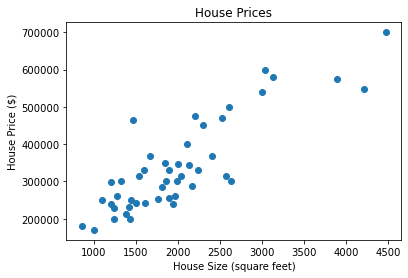

In [3]:
m = len(size)
print("We have been given {} samples".format(m))

# Plot sample points (price vs size)
plt.plot(size, price, 'o')
plt.title('House Prices')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price ($)')
plt.show()

We want to automatically find a model to predict prices $y$ for houses that are not in our dataset. In linear regression, the model $f$ is a linear function of the input data ($x$, in our case the house size):

> $f_w(x) = w_0 + w_1 x$

For this we need to choose the parameters $w_i$ minimizing a cost function $J$ e.g. the average squared difference between the predictions ($f_w$) and the real prices ($y$) in our training data:

> $\hat{w} = \underset{w}{\text{minimize}} {1 \over 2m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)})^2}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in our training set.

This optimization problem can be solved in different ways, in this example we are going to implement the Gradient Descent algorithm. In pseudo-code the Gradient Descent algorithm is formalized as follows:

repeat until convergence:

> {
> 
> $w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)
>
> }

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by (generic expression):

> $\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

In our case, the partial derivatives for $w_0$ and $w_1$ are:

> $\frac{\partial}{\partial w_0} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)})}$

> $\frac{\partial}{\partial w_1} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x^{(i)}}$

Let's see a first (very inefficient, but quite explicit) version of the Gradient Descent algorithm in Python:

In [4]:
def GradientDescent(x, y, max_iterations=100, lr=0.01):
    m = len(x) # number of samples
    J = np.zeros(max_iterations)
   
    #initialize the parameters to zero (or any other random value)
    w0 = 0
    w1 = 0
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum of derivatives over the different samples
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            f = w0 + w1 * x[i]
            s0 = s0 + (f - y[i])
            s1 = s1 + (f - y[i])* x[i]
            J[it] = J[it]+(f - y[i])**2
        Grad0 = s0 / m # Now get the average
        Grad1 = s1 / m 
        J[it] /= 2*m
        
        w0 = w0 - lr * Grad0
        w1 = w1 - lr * Grad1
        
    return [w0, w1], J

Estimated weights: [0.08050805332714407, 163.9249033496211]


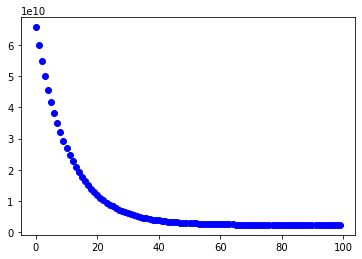

In [5]:
# Run gradient descent on our data
w, J = GradientDescent(x = size, y = price, max_iterations=100, lr=0.00000001)

print("Estimated weights:", w)
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

<font color=blue>**Exercise:** Do a scatter plot of your data and a plot of the line you just estimated. </font>

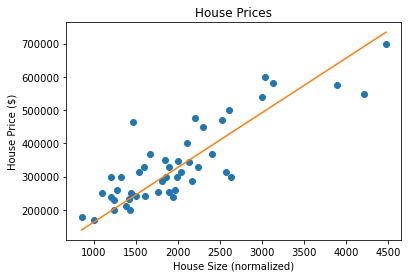

In [8]:
# Your Code Here #

# Plot sample points.
plt.plot(size, price,'o') # plot dots ('o') for each sample (house size, house price)
plt.title('House Prices')
plt.xlabel('House Size (normalized)')
plt.ylabel('House Price ($)')

# Plot line f = w0 + w1 * x
xx = range(int(min(size)),int(max(size)))
yy = [w[0] + w[1] * x for x in xx]
plt.plot(xx,yy)
plt.show()

<br>

<font color=blue>**Exercise:** Use the model you have calculated to predict the price of a house with `size = 3200` square feet.</font>

In [9]:
# Your Code Here #

hs = 3200
hp = w[0] + w[1] * hs

print("The price of a house with size = 3200 is:", hp)

The price of a house with size = 3200 is: 524559.7712268408


<font color=blue>**Exercise:** Redo the model fitting using the gradient descent function with different initial values for the weights. What do you observe?</font>

---

*Answer*

The second weight (the slope: $w_1$) converges to the same value every time, while the first weight (the intercept $w_0$) does not move away from the initial value that we set. It seems like the learning rate works for $w_1$ but not for $w_0$.

---


<br>

There are existing implementations for linear regression available for Python. For example, using the sklearn module's implementation, it would be:

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(size).reshape(-1, 1)
y = price

reg = LinearRegression().fit(x, y)

print('The estimated value of theta 0 (the intercept of the line) is: {0}'.format(reg.intercept_))
print('The estimated value of theta 1 (the slope) is: {0}'.format(reg.coef_[0]))

print('The estimated price for a house with size = 3200 using the model would be: {0}'.format(reg.predict([[3200]])))

The estimated value of theta 0 (the intercept of the line) is: 71270.49244872906
The estimated value of theta 1 (the slope) is: 134.52528772024135
The estimated price for a house with size = 3200 using the model would be: [501751.4131535]


<br>

<font color=blue>**Exercise:** Have a look at the help pages for the `LinearRegression()` function of `sklearn`, as well as a read of the help page of the function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) </font>

<br>

<font color=blue>**Food for thought:** The parameters that the sklearn model obtains seem to be quite different from what our model does... you could try a few more values in or outside the range of house sizes we have. Which model is better in your opinion? Why? Where does this difference come from?</font>

Predicted price (sklearn): 676634.2871898152
Predicted price (ours)   : 744224.3713969392
Predicted price (ours normalised)   : 676616.314836612


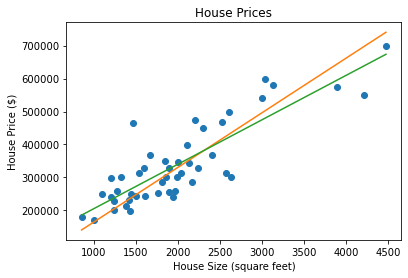

In [11]:
# YOUR CODE HERE

hs = 4500

hp_sklearn = reg.intercept_ + reg.coef_[0]*hs
print('Predicted price (sklearn): '+str(hp_sklearn))

[w, J] = GradientDescent(size, price, max_iterations = 500, lr=0.00000001)
hp_ours = w[0]+w[1]*hs
print('Predicted price (ours)   : '+str(hp_ours))

size_normalised = (size-size.mean())/size.std()
hsn = (hs-size.mean())/size.std()
[wn, J] = GradientDescent(size_normalised, price, max_iterations=100, lr=0.1)
hp_ours_n = wn[0]+wn[1]*hsn
print('Predicted price (ours normalised)   : '+str(hp_ours_n))

# Plot sample points.
plt.plot(size, price,'o') # plot dots ('o') for each sample (house size, house price)
plt.title('House Prices')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price ($)')

# Plot line y = w0 + w1 * x
xx = range(int(min(size)),int(max(size)))
yy = [w[0] + w[1] * x for x in xx]
plt.plot(xx, yy, )

yy = [reg.intercept_ + reg.coef_[0]* x for x in xx]
plt.plot(xx, yy)

plt.show()

---

*Answer*

The reason for this mismatch is the fact that we did not normalise our features before we do gradient descent. This impedes our algorithm (which is absolutely correct) to find a good solution.

---


<font color=blue>**Exercise:** Now normalise your data and do the gradient descent again. Adjust the number of iterations and the learning rate as you see fit. What do you observe in terms of the learning rate required? What do you observe in terms of the final values obtained for the weights?</font>

Estimated weights: [340403.61773803073, 105761.32424947785]


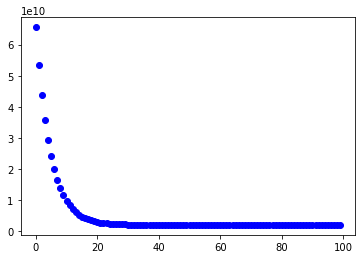

In [12]:
# Your Code Here #

size_mean = np.mean(size)
size_std = np.std(size)

size_normalised = (size-size_mean)/size_std

w, J = GradientDescent(x = size_normalised, y = price, max_iterations=100, lr=0.1)

print("Estimated weights:", w)
plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

---

*Answer*

The learning rate does not need to be so small anymore. We can now find a "reasonable" value for the learning rate.

The initial value for $w_0$ is not so important anymore, the learning rate works for both weights.

The weight values we obtain are very different than before (much larger)

---

## 1.2 Writing our Gradient Descent in a more efficient way, and Multiple regression

We will rewrite the gradient descent function, vectorising our variables and most of our for loops and including a stopping criterion that checks for convergence. Have a look at the explanatory notebook if you cannot understand how the following line works:

`grad = np.dot(X.T , (np.dot(X,theta) - y)) / m;`

Where `X` is the input (the Design Matrix) `y` is the vector column of the output, and `w` is a vector column of the parameters.

In [13]:
def GradientDescent_np(X, y, max_iterations=10000, lr=0.1, epsilon = 0.000001):
    m, n = X.shape # number of samples, number of features
    J = []
    
    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)

    #initialize the weights to zero (or anything else you want, e.g. a small random value)
    w = np.zeros(shape=(n, 1))
    
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X, w) - y)) / m;
        w = w - lr*grad
        J.append(sum( (np.dot(X, w) - y)**2) / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
    return [w, np.array(J)]

Let's use the new version of Gradient Descent to calculate the parameter values . In order to do so, we have to create our design matrix `X` and feed it to the function. As a reminder, the design matrix should have as many rows as samples and as many columns as features (including the "fake" $x_0$ feature of ones, that is multiplied with the bias term).

First few rows of our design matrix:
[[1.000e+00 2.104e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 2.400e+03]
 [1.000e+00 1.416e+03]]
First few rows of our normalised design matrix:
[[ 1.          0.13000987]
 [ 1.         -0.50418984]
 [ 1.          0.50247636]
 [ 1.         -0.73572306]]
Gradient Descent converged after 177 iterations
Estimated weights: [[340412.65713569]
 [106907.56159506]]


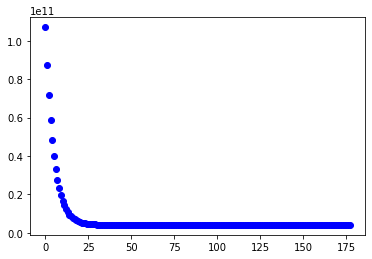

In [14]:
#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), and concatenating the size feature
X = np.hstack( (np.ones(shape=(size.shape[0], 1)), size.reshape(size.shape[0], 1)))

#Let's print out a few samples to verify we have done this right
print("First few rows of our design matrix:")
print(X[0:4, :])

# Scale features and set them to zero mean (standarize)
mu = X.mean(axis = 0) #calculate the mean for every column
sigma = X.std(axis = 0, ddof=1) #calculate the standard deviation for every column

#normalize only X1. Do not normalise X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];

#Let's print out a few samples to verify we have done this right
print("First few rows of our normalised design matrix:")
print(X[0:4, :])

w, J = GradientDescent_np(X, price, lr=0.1)
print('Estimated weights:', w)

plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

<font color=blue>**Exercise:** Do the same, but this time using the rooms feature as well</font>

Gradient Descent converged after 363 iterations
Estimated weights: [[340412.65957447]
 [110631.04383616]
 [ -6649.46782814]]


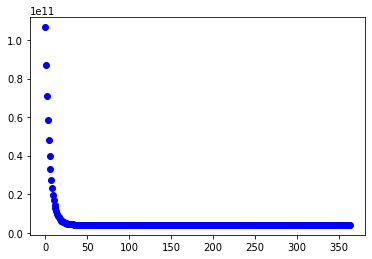

In [15]:
# Your Code Here #

#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), 
#and concatenating the size and rooms features (you could also use the np.concatenate() function)
X = np.hstack( (np.ones(shape=(size.shape[0], 1)), size.reshape(size.shape[0], 1), rooms.reshape(rooms.shape[0], 1)))

# Scale features and set them to zero mean (standarize)
mu = X.mean(axis = 0) #calculate the mean for every column
sigma = X.std(axis = 0, ddof=1) #calculate the standard deviation for every column

#normalize everything except X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = (X[:,2] - mu[2]) / sigma[2];

w, J = GradientDescent_np(X, price, lr=0.1)
print('Estimated weights:', w)

plt.plot(np.arange(len(J)), J, 'bo')
plt.show()

## 1.3 Polynomial Regression

Suppose you are given the following samples for a problem:

In [17]:
# Load the Polynomial dataset
import pickle

with open('PolynomialData.pkl', 'rb') as f:
    feat, out = pickle.load(f)

print (x.shape)
print (y.shape)

(47, 1)
(47,)


Let's make a plot of the above samples

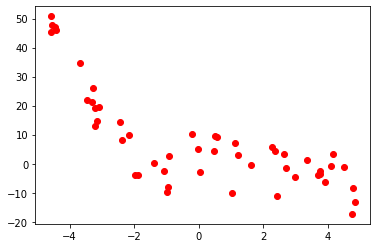

In [18]:
plt.plot(feat, out, 'ro') # Plot the feature versus the output, using big red circles
plt.show()

In order to use the linear gradient descent above to fit a polynomial, what we have to do is generate new features, from the existing ones. For example we could generate a new feature $feat_2$ and calculate its values as the square of $feat$: $feat_2 = feat^2$.

Similarly we could create more new features like:

$feat_3 = feat^3$

$feat_4 = feat^4$

$...$

Let's create such new features. We will first define a helper function for that, that generates and normalises features up to the desired degree.

In [19]:
def mapFeatureAndNormalise_Polynomial(x, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a new feature vector comprising of
    1, x, x^2, x^3, ..., x^degree
    '''
    
    x = x.reshape(-1, 1) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    
    DesignMatrix = np.ones_like(x) # start with a column of ones
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

Let's try it out, by creating new features up to degree `deg` out of our single feature `feat`. What we expect to get in the output is $deg+1$ features, as we are also counting the feature $x_0$

In [20]:
deg = 6
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, deg)

print("The shape of our design matrix is:", X.shape)
print("The shape of mu (and sigma) is:", mu.shape)

The shape of our design matrix is: (50, 7)
The shape of mu (and sigma) is: (7,)


Let's now use our gradient descent function to fit a 2-degree polynomial model to the same data. To do this, we should pass to the function the set of features up to the power of 2, so our design matrix would comprise three features: $[1, feat, feat^2]$

Gradient Descent converged after 46 iterations
Estimated weights: [[  7.84508161]
 [-13.60617806]
 [  7.01741506]]


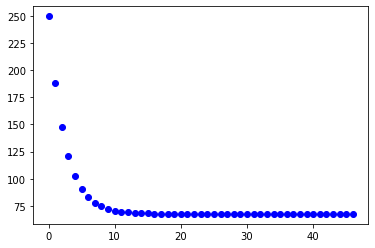

In [21]:
deg = 2
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, deg)

w, J = GradientDescent_np(X, out, lr=0.2)
print('Estimated weights:', w)  # Since we passed it three features, we expect to receive values for three weights

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

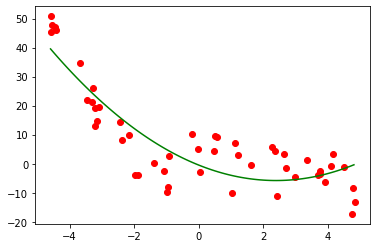

In [22]:
# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

# Now for each of our points in the range defined above, we need to calculate what our model gives us
# IMPORTANT: in order to pass the values in xx through our model, we need to create and normalise polynomial features in the same way as before!
X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = 2, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line
plt.show()

<font color=blue>**Exercise:** What is the final cost value of the above fit?</font>

In [23]:
#Your Code Here#

# The final Cost value is the last value we have in the list of costs (the cost at the very last iteration). We can access it by indexing at -1 (one element from the end of the list)
print('Final cost:{0}'.format(J[-1]))

Final cost:[67.5582234]


<font color=blue>**Exercise:** Can you fit a 15-degree polynomial? What is the final cost value in this case?</font>

Gradient Descent converged after 13000 iterations
Estimated weights: [[  7.8453003 ]
 [  7.55798605]
 [-10.42602886]
 [-35.80811109]
 [ 48.58661973]
 [ 14.45479186]
 [-32.02290975]]


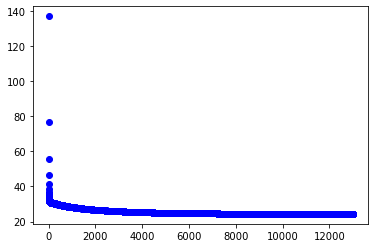

<Figure size 432x288 with 0 Axes>

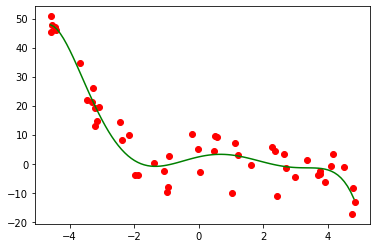

Final cost:[24.3195955]


In [24]:
#Your Code Here#

deg = 6
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, deg)

w, J = GradientDescent_np(X, out, max_iterations = 50000, lr=0.2, epsilon = 0.00001)
print('Estimated weights:', w)  # Since we passed it three features, we expect to receive values for three weights

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

# Plot fit
plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

# Now for each of our points in the range defined above, we need to calculate what our model gives us
# IMPORTANT: in order to pass the values in xx through our model, we need to create and normalise polynomial features in the same way as before!
X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = deg, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line
plt.show()

print('Final cost:{0}'.format(J[-1]))

<font color=blue>**Exercise:** Fit polynomials of all degrees from 0 to 15 and plot the evolution of the final cost (at convergence) with respect to the degree of the model.</font>

Gradient Descent converged after 33 iterations
Gradient Descent converged after 37 iterations
Gradient Descent converged after 40 iterations
Gradient Descent converged after 370 iterations
Gradient Descent converged after 389 iterations
Gradient Descent converged after 4246 iterations
Gradient Descent converged after 13000 iterations
Gradient Descent converged after 35369 iterations
Gradient Descent converged after 35516 iterations
Gradient Descent converged after 21850 iterations
Gradient Descent converged after 23704 iterations
Gradient Descent converged after 15179 iterations
Gradient Descent converged after 17448 iterations
Gradient Descent converged after 16332 iterations
Gradient Descent converged after 15531 iterations


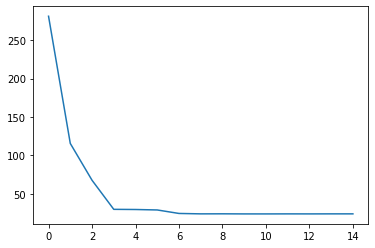

In [25]:
#Your Code Here#

Costs = []
for deg in range(0, 15):
    X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, deg)
    w, J = GradientDescent_np(X, out, lr=0.2, max_iterations = 50000, epsilon = 0.00001)
    Costs.append(J[-1])
    
plt.plot(Costs)

<font color=blue>**Exercise:** Add regularisation to our Gradient Descent algorithm and run gradient descent with a polynomial of degree 15 again. What do you observe?</font>

In [26]:
#Your Code Here#

def GradientDescent_np_reg(X, y, max_iterations=10000, lr=0.1, epsilon = 0.000001, l=0):
    m, n = X.shape # number of samples
    J = []

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)

    #initialize the weights to zero (or anything else you want, e.g. a small random value)
    w = np.zeros(shape=(n, 1))
        
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        w_temp = w.copy()
        w_temp[0] = 0 # ignore the bias term in the regularisation        

        grad = (np.dot(X.T , (np.dot(X, w) - y)) + 2 * l * w )/ m;
        w = w - lr*grad        
        
        J.append(sum( (np.dot(X, w) - y)**2 + l * np.dot(w_temp.T, w_temp)) / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
    return [w, np.array(J)]

Gradient Descent converged after 1795 iterations
Estimated weights: [[ 6.37953511]
 [-3.47995503]
 [ 2.52497264]
 [-3.22551587]
 [ 1.85452911]
 [-2.42008404]
 [ 1.28189227]
 [-1.85098517]
 [ 0.90175154]
 [-1.49476147]
 [ 0.64187963]
 [-1.27221586]
 [ 0.45124814]
 [-1.12822284]
 [ 0.30197076]
 [-1.02996168]]
Final cost:[90.69131358]


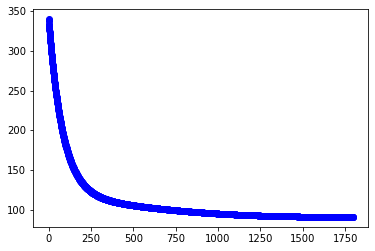

In [27]:
deg = 15
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, deg)

w, J = GradientDescent_np_reg(X, out, max_iterations = 50000, lr=0.001, epsilon = 0.00001, l=1)
print('Estimated weights:', w)  # Since we passed it three features, we expect to receive values for three weights

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

print('Final cost:{0}'.format(J[-1]))

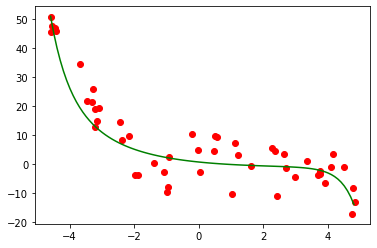

In [28]:
# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

# Now for each of our points in the range defined above, we need to calculate what our model gives us
# IMPORTANT: in order to pass the values in xx through our model, we need to create and normalise polynomial features in the same way as before!
X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = deg, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line
plt.show()

---

*Answer*

We tried different values for $\lambda$, here we show results for $\lambda = 1.0$.

When using regularisation we seem to converge more rapidly, and the final fit is clearly not overfitting anymore.

The weight values obtained are smaller than before, although all of them are still non-zero. The L2 regularisation we are using is not doing any hard selection of a model.

The final cost is much higher than the non-regularised case, which is expected.

---


## 1.4 Logistic Regression

We are given a synthetic dataset comrpising of m samples of two features each, that correspond to either of two classes $[0, 1]$. First load the data and plot it.

In [29]:
# Load the synthetic dataset
import pickle

with open('RingsData.pkl', 'rb') as f:
    X, y = pickle.load(f)

print ("# Samples, # Features:", X.shape)
print ("# target outputs:", y.shape)

# Samples, # Features: (117, 2)
# target outputs: (117,)


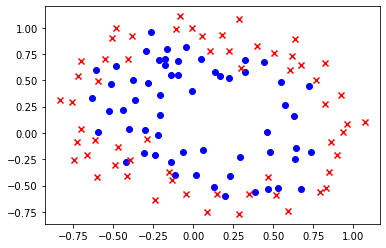

In [30]:
# Plot the data
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

We are going train a binary classifier using the Logistic Regression model: $f_w(\textbf{x}) = \frac{1}{1+e^{-w^\intercal \textbf{x}}}$

For this we need to fit the parameters $w$ to our dataset by minimizing the cost function $J$:

$\hat{w} = \underset{w}{\text{minimize}} {1 \over m} \sum_{i=1}^m{-y^{(i)}\log(f_w(x^{(i)}) - (1-y^{(i)})\log(1-f_w(x^{(i)})}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

repeat until convergence (or max. number of iterations) 

{

$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $f_w(\textbf{x})$, our model. In the case of Logistic Regression $f_w(\textbf{x})$ is the sigmoid function of $w^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $f_w(\textbf{x})$.

In [31]:
import numpy as np

def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))


def GradientDescent_logistic(X, y, max_iterations=10000, lr=0.1, epsilon = 0.0000001):
    '''
    Gradient descent function for logistic regression without regularisation.
    X is the design matrix, y is the target outputs (in this case it should have values of either 0 or 1)
    '''    
    m, n = X.shape # number of samples, number of features
    J = []
    
    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
       
    # Repeat until convergence (or max_iterations)
    for iteration in range(max_iterations):
        f = sigmoid(np.dot(X, w))
        error = (f-y)
        gradient = np.dot(X.T , error) / m
        w = w - lr*gradient
        
        J.append(sum(-y * np.log(f) - (1-y) * np.log(1-f)) / m)
        
        # Stopping Criterion
        if (iteration > 2) and ( abs(J[-2] - J[-1]) < epsilon):
            print ("Gradient Descent converged after {} iterations".format(iteration))
            break
        
    return [w, np.array(J)]


def classifyVector(X, w):
    '''
    Evaluate the Logistic Regression model h(x) with theta parameters,
    and returns the predicted label of x.
    '''
    prob = sigmoid(np.dot(X, w))
    ret = np.zeros_like(prob) # These next three lines are just in order to be able to deal with single (vector) or multiple (matrix) inputs
    ret[prob > 0.5] = 1
    ret = ret.squeeze()
    return ret

In [32]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary(X, y, w):    
    #Plot data
    plt.scatter(X[:, 0], X[:,1], cmap = "Set1", c = y)

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):            
            z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))

    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

Gradient Descent converged after 477 iterations
Estimated weights: [[-0.00167667]
 [-0.25101695]
 [-0.01889087]]
Training Accuracy : 0.5470085470085471


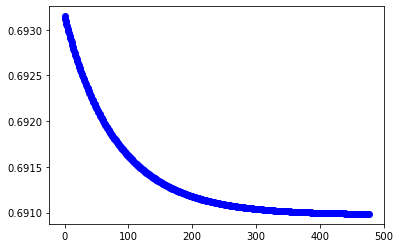

In [33]:
# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) )

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)
print ("Estimated weights:", w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

#Evaluate the classifier accuracy in the training data
H = classifyVector(Xaugmented, w)
print ("Training Accuracy :", np.sum(H == y) / m)

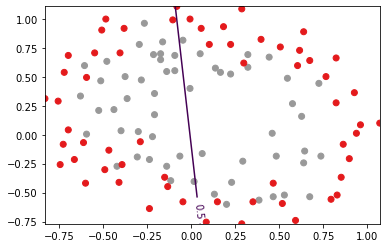

In [34]:
plotDecisionBoundary(X, y, w)

As can be seen in the previous plot the classification boundary with 2 features fits very poorly our data.

One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of $x_1$ and $x_2$ up to the $deg$ power. 

$MapFeature(x_1,x_2) = [1, x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^{(deg-1)}, x_2^{(deg)}]$

The Logistic Regression classifier trained on such high dimensional feature spaces will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

In [35]:
def mapFeatureAndNormalise_AllQuadTerms(x1, x2, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    '''
    
    x1 = x1.reshape(-1, 1) # make it into a column vector
    x2 = x2.reshape(-1, 1) # make it into a column vector

    DesignMatrix = np.ones_like(x1) # start with a column of ones
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            c = (x1 ** (i - j)) * (x2 ** j)
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd            
            
    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, DesignMatrix.shape[1]):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i];

    return DesignMatrix, mu, sigma

Let's try it out for degree = 3. We expect to get an output of 10 features: $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]$

In [36]:
deg = 3
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)
print("output has shape:", features.shape) # Should be m rows (equal to the number of data points) and 10 rows (equal to the number of features)
print("Mean (and Sigma) has shape", mu.shape)

output has shape: (117, 10)
Mean (and Sigma) has shape (10,)


Now we will use these new features to do logistic regression

In [37]:
deg = 3
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features, y)

out = classifyVector(features, w)
print ("Training Accuracy :", float(np.sum(out == y)) / m)

Gradient Descent converged after 5290 iterations
Training Accuracy : 0.8547008547008547


Plotting your results using our old function does not work well now, as we want to plot in the original space, but our model works in the new feature space we created. We have to inform our plotting function about what kind of feature embedding (degrees, means and sigmas it should use). We update this below - once again, you can just accept this code as is.

In [38]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees, means, sigmas):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):        
            feature, _, _ = mapFeatureAndNormalise_AllQuadTerms(x1 = np.array(u[i]), x2 = np.array(v[j]), degree = degrees, preCalcMeans = means, preCalcStd=sigmas)
            z[i, j] = sigmoid(feature.dot(w))
            
    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

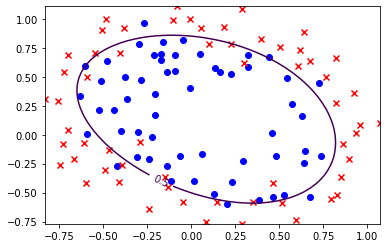

In [39]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

<font color=blue>**Exercise:** Generate features of different degrees, up to degree 15 and run gradient descent. What do you observe?</font>

In [40]:
# Your Code Here#

deg = 15
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features,y, max_iterations = 20000, epsilon = 0.000001)

out = classifyVector(features, w)
print ("Training Accuracy :", float(np.sum(out == y)) / m)

Gradient Descent converged after 16369 iterations
Training Accuracy : 0.9145299145299145


C:\ProgramData\Anaconda3\envs\analysis\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


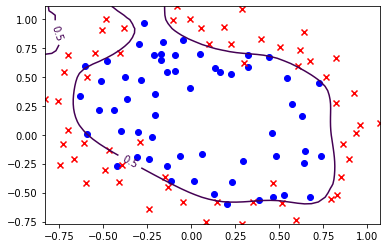

In [41]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

---

*Answer*

For high degrees, the solutions are overfitting the data

---


<font color=blue>**Exercise:** Add regularisation to our Gradient Descent algorithm and run gradient descent with features of degree up to 15. What do you observe?</font>

In [42]:
def GradientDescent_logistic_reg(X, y, max_iterations=10000, alpha=0.1, epsilon = 0.0000001, lam = 1):
    # Your Code Here
    # ...
    
    m, n = X.shape # number of samples, number of features
    J = []

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations or until we have converged
    for iteration in range(max_iterations):
        f_x = sigmoid(X @ w)
        residual = (f_x-y)
        
        w_copy = w.copy()
        w_copy[0] = 0 # ignore the bias term in the regularisation        
        gradient = (np.dot(X.T , residual) + 2 * lam * w_copy) /m  # ADDED THE REGULARISATION TERM
        w = w - alpha*gradient
        
        J.append( sum(-y*np.log(f_x)-(1-y)*np.log(1-f_x)) / m  + lam * np.squeeze(w_copy.T @ w_copy) / m)
        
        if (iteration > 1) and (J[-2] - J[-1]) < epsilon:
            print("Converged after {} iterations".format(iteration))
            break
            
    return [w, np.squeeze(J)]

In [43]:
#Logistic Regression gradient descent optimization
deg = 15
(features, mu, sigma) = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree=deg)

w, J = GradientDescent_logistic_reg(features, y, max_iterations=50000, alpha = 0.1, lam = 1.5)

out = classifyVector(features, w)
print ("Training Accuracy :", float(np.sum(out == y)) / m)

Converged after 1413 iterations
Training Accuracy : 0.8547008547008547


C:\ProgramData\Anaconda3\envs\analysis\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


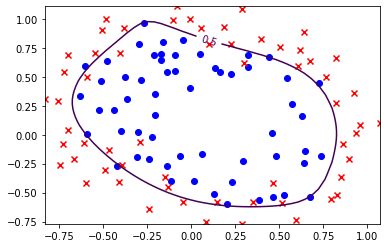

In [44]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

---

*Answer*

We get a much smoother decision boundary, and lower performance on the training set, but this is expected to generalise much better on unseen data.

---


## 1.5 Using sklearn

This section has no exercises. Your task is to read the manual, and understand how to repeat everything we have done up to now using the functions available in the library scikit-learn.

To get you started, this is the overview manual page for linear models: https://scikit-learn.org/stable/modules/linear_model.html

### Linear Regression

Read the manual page here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [45]:
# Load the House dataset
with open('HouseData.pkl', 'rb') as f:
    X, y = pickle.load(f)
    
print (X.shape)
print (y.shape)

size = X[:, 0]
size = size.reshape(-1, 1)

(47, 2)
(47,)


In [46]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(size, y) # Note that we do not pass the bias feature explicitly, as by default the linear model adds it (it is the "intercept")

print(model.intercept_, model.coef_)

71270.49244872906 [134.52528772]


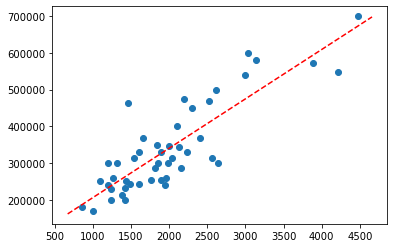

In [47]:
plt.scatter(size, y)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = model.intercept_ + model.coef_[0] * x_vals
plt.plot(x_vals, y_vals, 'r--')

In [48]:
#predict values on the training set
test_sizes = np.array([1000, 2500, 3200, 4000])
test_sizes = test_sizes.reshape(-1, 1)

model.predict(test_sizes)

array([205795.78016897, 407583.71174933, 501751.4131535 , 609371.64332969])

Now we can repeat the process, but using the standard scaler of scikit-learn to standardise the features before we start: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(size)
print("Mean:", scaler.mean_, "Var:", scaler.var_)
size_scaled = scaler.transform(size)

Mean: [2000.68085106] Var: [618114.55771842]


In [50]:
model.fit(size_scaled, y)

print(model.intercept_, model.coef_)

340412.6595744681 [105764.13349282]


The `StandardScaler` object, once fit, keeps track of the way it did the scaling, and can be used again with any new data.

In [51]:
test_sizes = np.array([1000, 2500, 3200, 4000])
test_sizes = test_sizes.reshape(-1, 1)
test_sizes = scaler.transform(test_sizes) # normalise them the same way as we did for the training set, before we pass them through our model
model.predict(test_sizes)

array([205795.78016897, 407583.71174933, 501751.4131535 , 609371.64332969])

### Polynomial Regression

Read the manual page: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
# Load the Polynomial dataset
with open('PolynomialData.pkl', 'rb') as f:
    x, y = pickle.load(f)

print (x.shape)
print (y.shape)

(50, 1)
(50,)


In [54]:
poly = PolynomialFeatures(3, include_bias = False ) # up to second degree features, but do not include the bias term (degree 0 invented feature)
x_poly = poly.fit_transform(x)

scaler = StandardScaler()
scaler.fit(x_poly) 
print("Mean:", scaler.mean_, "Var:", scaler.var_)
x_poly = scaler.transform(x_poly)

Mean: [0.044      9.159792   2.36463944] Var: [   9.157856     55.85142897 2473.0161783 ]


In [55]:
model = linear_model.LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [56]:
print(model.intercept_, model.coef_)

7.845300302600001 [  1.86012922   7.43704704 -16.56649192]


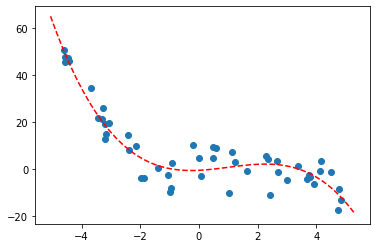

In [57]:
plt.scatter(x, y)

axes = plt.gca()
x_lims = np.array(axes.get_xlim())
xx = np.linspace(x_lims[0], x_lims[1], 100)

xx_poly = poly.fit_transform(xx.reshape(-1, 1))
xx_poly = scaler.transform(xx_poly)

y_vals = model.intercept_ + model.coef_ @ xx_poly.T
plt.plot(xx, y_vals, 'r--')

In [58]:
#predict values on the training set
x_test = np.array([-4, 0, 4])
x_test = x_test.reshape(-1, 1)

x_test_poly = poly.transform(x_test)
x_test_poly = scaler.transform(x_test_poly)

y_hat = model.predict(x_test_poly)
y_hat

array([34.27472471, -0.50926569, -3.44883471])

### Logistic Regression

Read the manual page: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [59]:
# Load the synthetic dataset
import pickle

with open('RingsData.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


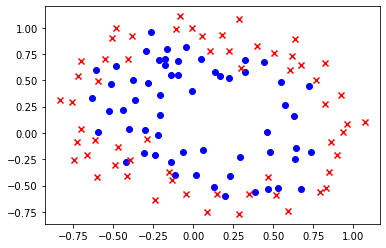

In [60]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000)
clf.fit(X, y)
clf.predict(X)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [62]:
clf.predict_proba(X[:5]) # for the first 5 data points

array([[0.50682367, 0.49317633],
       [0.49834682, 0.50165318],
       [0.49131995, 0.50868005],
       [0.48100745, 0.51899255],
       [0.47277988, 0.52722012]])

In [63]:
# calculate accuracy
clf.score(X, y)

0.5470085470085471

This is no good, as expected there is no linear decision boundary that separates well the two classes. Now let's create polynomial features

In [64]:
poly = PolynomialFeatures(15) # up to second degree features
x_poly = poly.fit_transform(X)
x_poly.shape

(117, 136)

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000, penalty = 'none') # without regularisation, note that it takes ages to converge (see the warning message!)
clf.fit(x_poly, y)
clf.predict(x_poly)

C:\ProgramData\Anaconda3\envs\analysis\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
clf.predict_proba(x_poly[:5]) # for the first 5 data points

array([[7.52532372e-04, 9.99247468e-01],
       [2.08721929e-14, 1.00000000e+00],
       [6.66133815e-16, 1.00000000e+00],
       [4.38408421e-10, 1.00000000e+00],
       [1.04611763e-04, 9.99895388e-01]])

In [67]:
# calculate accuracy
clf.score(x_poly, y)

0.9743589743589743

We seem to be overfitting. Finally, let's add L2 regularisation

In [68]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000, penalty = 'l2')
clf.fit(x_poly, y)
clf.predict(x_poly)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [69]:
clf.predict_proba(x_poly[:5]) # for the first 5 data points

array([[0.27741371, 0.72258629],
       [0.25981727, 0.74018273],
       [0.27652901, 0.72347099],
       [0.2642877 , 0.7357123 ],
       [0.34582692, 0.65417308]])

In [70]:
# calculate accuracy
clf.score(x_poly, y)

0.8376068376068376

Do a confusion matrix. Read the manual page here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [71]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_poly)
confusion_matrix(y, y_pred)

array([[44, 15],
       [ 4, 54]], dtype=int64)

## 1.6 Training, Validation and Test set

Up to now we have been calculating performance on the training set. Here we will see how we can manage different dataset splits using scikit-learn.

In [72]:
# Load the synthetic dataset
import pickle

with open('RingsData.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


<font color=blue>**Exercise:** Using the classification dataset above. Split your dataset into a training and test set (80% random). Have a look at the manual page here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</font>

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Your Code Here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<font color=blue>**Exercise:** Use a polynomial model like before with logistic regression. Train it on the training set without regularisation. Then test on training and test set. Plot the final costs in the same plot for different degrees of the polynomial model, from 1 to 15.</font>

In [75]:
# Your Code Here

from sklearn.linear_model import LogisticRegression

AccTrain = []
AccTest = []

for deg in range(1, 15):
    poly = PolynomialFeatures(deg) # up to second degree features
    x_poly_train = poly.fit_transform(X_train)
    x_poly_test = poly.fit_transform(X_test)

    clf = LogisticRegression(random_state=0, max_iter = 10000, penalty = 'none') # without regularisation, note that it takes ages to converge, if at all
    clf.fit(x_poly_train, y_train)

    # calculate accuracy on the training set
    AccTrain.append(clf.score(x_poly_train, y_train))

    # calculate accuracy on the test set
    AccTest.append(clf.score(x_poly_test, y_test))

C:\ProgramData\Anaconda3\envs\analysis\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\envs\analysis\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

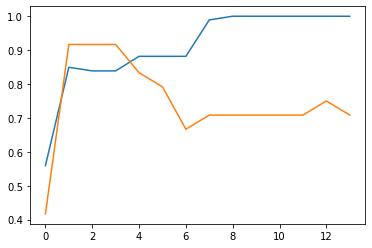

In [76]:
plt.plot(range(len(AccTrain)), AccTrain)
plt.plot(range(len(AccTest)), AccTest)

<font color=blue>**Exercise:** What do you observe?</font>

---

*Your Answer Here*

*At the beginning, improvements in the model cause higher accuracy on the training set which is also reflected in higher accuracy on the test set. Eventually though, we start overfitting, and we observe that accuracy keeps increasing in the training set, but it goes down in the test set. This is a clear indication of overfitting.*

---

<font color = blue>**Exercise:** Now do 5-fold cross-validation. Then report the average performance and its standard deviation</font>

See the manual page at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [77]:
# Your Code Here

from sklearn.model_selection import cross_validate

poly = PolynomialFeatures(15)
x_poly = poly.fit_transform(X)

cv_results = cross_validate(clf, x_poly, y, cv=5)

In [78]:
cv_results

{'fit_time': array([0.60065389, 0.08395243, 0.25785351, 1.12435341, 0.32484603]),
 'score_time': array([0.        , 0.00099921, 0.        , 0.        , 0.        ]),
 'test_score': array([0.70833333, 0.625     , 0.56521739, 0.56521739, 0.56521739])}

In [79]:
print("Mean accuracy:", np.mean(cv_results['test_score']), "\t Std:", np.std(cv_results['test_score']))

Mean accuracy: 0.6057971014492753 	 Std: 0.0562540110357826
